In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:

# Parâmetros
R = 1.0                          # Período do potencial
alpha = 0.1                      # Intensidade do potencial periódico
n_ondas_planas = 10             # Número de ondas planas (controla dimensão do Hamiltoniano)
k_vals = np.linspace(-np.pi, np.pi, 400)  # k na 1ª zona de Brillouin

In [7]:
# Índices dos vetores G (de -N a N, centrado em zero)
G_indices = np.arange(-n_ondas_planas, n_ondas_planas + 1)
G_vals = 2 * np.pi * G_indices  # G_n = 2πn

In [8]:
# Construção das bandas
bandas = []
for k in k_vals:
    H = np.zeros((len(G_vals), len(G_vals)), dtype=np.complex128)

    for i, Gi in enumerate(G_vals):
        for j, Gj in enumerate(G_vals):
            if i == j:
                H[i, j] = (k - Gi)**2  # λ(k - G)
            elif abs(i - j) == 1:
                H[i, j] = alpha       # Acoplamento V_{i,j} = α δ_{i,j±1}

    # Diagonaliza o Hamiltoniano
    eigvals = np.linalg.eigvalsh(H)
    bandas.append(np.sort(eigvals))

bandas = np.array(bandas)

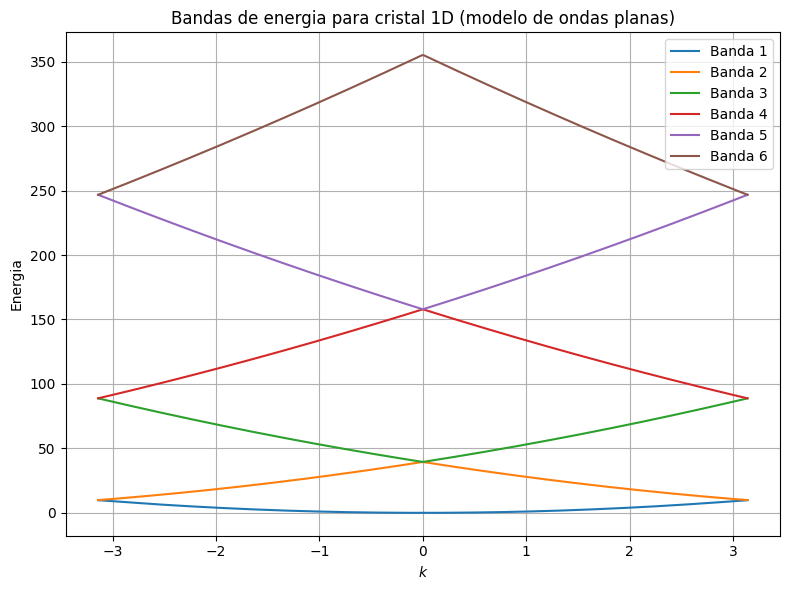

In [9]:
# Plot
plt.figure(figsize=(8, 6))
for n in range(6):  # Plota as 6 primeiras bandas
    plt.plot(k_vals, bandas[:, n], label=f'Banda {n+1}')

plt.xlabel(r'$k$')
plt.ylabel(r'Energia')
plt.title('Bandas de energia para cristal 1D (modelo de ondas planas)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Parte 2 - potencial periódico.

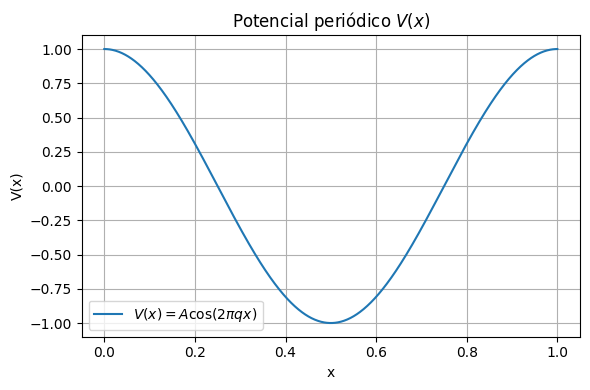

In [10]:
# Parâmetros
R = 1.0                          # Período do potencial
n_ondas_planas = 10             # Número de ondas planas
k_vals = np.linspace(-np.pi, np.pi, 400)  # k na 1ª zona de Brillouin

# Índices e vetores de G
G_indices = np.arange(-n_ondas_planas, n_ondas_planas + 1)
G_vals = 2 * np.pi * G_indices

# Espaço real para calcular V(x)
x_vals = np.linspace(0, 1, 1000)

# Escolha do potencial periódico V(x)
A = 1.0
q = 1
Vx = A * np.cos(2 * np.pi * q * x_vals)

# Plot de V(x)
plt.figure(figsize=(6, 4))
plt.plot(x_vals, Vx, label=r'$V(x) = A \cos(2\pi q x)$')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('Potencial periódico $V(x)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Construção da matriz V_{mn}
N = len(G_vals)
Vmn = np.zeros((N, N), dtype=complex)

for m in range(N):
    for n in range(N):
        integrand = Vx * np.exp(-1j * 2 * np.pi * (G_indices[m] - G_indices[n]) * x_vals)
        Vmn[m, n] = np.trapz(integrand, x_vals)

# Mostrar a matriz Vmn real
print("Matriz V_{mn} (parte real):")
print(np.real(Vmn))

Matriz V_{mn} (parte real):
[[-0.   0.5 -0.  -0.  -0.  -0.  -0.   0.   0.  -0.  -0.  -0.  -0.   0.
  -0.  -0.  -0.   0.  -0.  -0.  -0. ]
 [ 0.5 -0.   0.5 -0.  -0.  -0.  -0.  -0.   0.   0.  -0.  -0.  -0.  -0.
   0.  -0.  -0.  -0.   0.  -0.  -0. ]
 [-0.   0.5 -0.   0.5 -0.  -0.  -0.  -0.  -0.   0.   0.  -0.  -0.  -0.
  -0.   0.  -0.  -0.  -0.   0.  -0. ]
 [-0.  -0.   0.5 -0.   0.5 -0.  -0.  -0.  -0.  -0.   0.   0.  -0.  -0.
  -0.  -0.   0.  -0.  -0.  -0.   0. ]
 [-0.  -0.  -0.   0.5 -0.   0.5 -0.  -0.  -0.  -0.  -0.   0.   0.  -0.
  -0.  -0.  -0.   0.  -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.   0.5 -0.   0.5 -0.  -0.  -0.  -0.  -0.   0.   0.
  -0.  -0.  -0.  -0.   0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.   0.5 -0.   0.5 -0.  -0.  -0.  -0.  -0.   0.
   0.  -0.  -0.  -0.  -0.   0.  -0. ]
 [ 0.  -0.  -0.  -0.  -0.  -0.   0.5 -0.   0.5 -0.  -0.  -0.  -0.  -0.
   0.   0.  -0.  -0.  -0.  -0.   0. ]
 [ 0.   0.  -0.  -0.  -0.  -0.  -0.   0.5 -0.   0.5 -0.  -0.  -0.  -0.
  -0.   0.   0.  -0.  -0.  -0

/tmp/ipython-input-11-813657246.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Vmn[m, n] = np.trapz(integrand, x_vals)


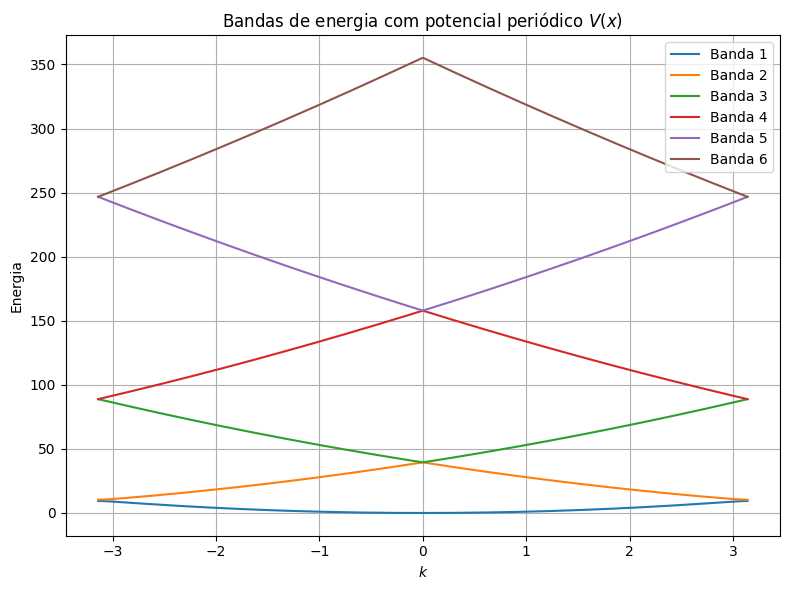

In [12]:
# Construção das bandas de energia com matriz V_{mn}
bandas = []
for k in k_vals:
    H = np.zeros((N, N), dtype=complex)
    for i, Gi in enumerate(G_vals):
        for j, Gj in enumerate(G_vals):
            if i == j:
                H[i, j] = (k - Gi)**2
            H[i, j] += Vmn[i, j]  # Adiciona o termo do potencial

    eigvals = np.linalg.eigvalsh(H)
    bandas.append(np.sort(eigvals))

bandas = np.array(bandas)

# Plot das bandas
plt.figure(figsize=(8, 6))
for n in range(6):
    plt.plot(k_vals, bandas[:, n], label=f'Banda {n+1}')

plt.xlabel(r'$k$')
plt.ylabel(r'Energia')
plt.title('Bandas de energia com potencial periódico $V(x)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()